## 1. Importing the libraries 

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import statsmodels
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

## 2. Reading Data and Data Understanding 

In [2]:
#loading the data into the dataframe
bikesharing = pd.read_csv('day.csv')

In [3]:
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#shape of the dataset
bikesharing.shape

(730, 16)

In [5]:
#checking the summary of the dataset
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#checking the descriptive statistics of the dataset
bikesharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#checking the columns of the dataset
bikesharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
#checking the data types of each column of the dataset
bikesharing.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Analysis -
- In the bike-sharing dataset, there are 730 rows and 16 columns.
- 'cnt' is the target variable in the dataset.

## 3. Data Cleaning 

#### Checking for null values in the dataset 

In [9]:
#null values in the dataset
bikesharing.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Checking for Duplicate Values in the dataset 

In [10]:
#creating a copy of dataset and dropping the duplicate values
bikesharing_dup = bikesharing
bikesharing_dup.drop_duplicates(subset = None, inplace = True)

In [11]:
#checking the rows of the duplicate dataset
bikesharing.shape

(730, 16)

Analysis -
- We can see that there are no missing or null values in the dataset.
- Also, we can see that there are exactly same rows and columns in both original and copy dataset, hnce, there are no duplicate values in the dataset.

#### Dropping the columns that are not useful for analysis 

Looking at the data dictionary of the dataset, we can conclude the following about the columns - 
- instant - We can see that the instant column is an index column, so we will drop it.
- dteday - We can see that this is the date column, which is already there in other columns, so will will drop it.
- casual and registered - we can see that the target variable i.e. cnt is the sum of casual and registered, so we will drop these two columns.

In [12]:
#before dropping, creating a new column days_old which indicates how old is the business 
bikesharing['days_old'] = (pd.to_datetime(bikesharing['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [13]:
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_old
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [14]:
#dropping the instant column
bikesharing.drop(['instant'], axis = 1, inplace = True)

In [15]:
#dropping the dteday column
bikesharing.drop(['dteday'], axis = 1, inplace = True)

In [16]:
#dropping the casual and redistered columns
bikesharing.drop(['casual'], axis = 1, inplace = True)
bikesharing.drop(['registered'], axis = 1, inplace = True)

In [17]:
#checking the dataframe after dropping
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [18]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  days_old    730 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 79.8 KB


In [19]:
bikesharing.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [20]:
bikesharing.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [21]:
bikesharing.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [22]:
bikesharing.weekday.value_counts()

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

Analysis -
- We can see that in the dataset there are some columns(season, weathersit, mnth, weekday) which are integers although they should be non-numerical categories.

#### Handling Outliers

In [23]:
bikesharing.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_old'],
      dtype='object')

In [24]:
#printing the no. of unique values in each column
bikesharing.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
days_old      730
dtype: int64

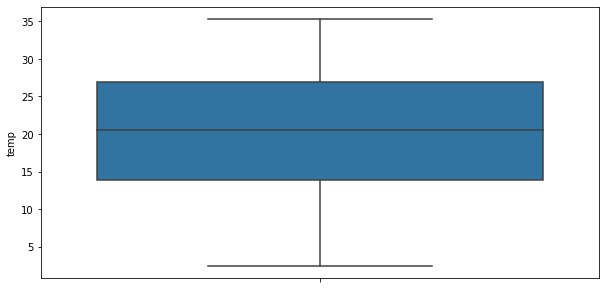

In [25]:
#creating a box plot fot variables with continuous values
#variable - temp
plt.figure(figsize = (10,5))
sns.boxplot(y = bikesharing['temp'], data = bikesharing)

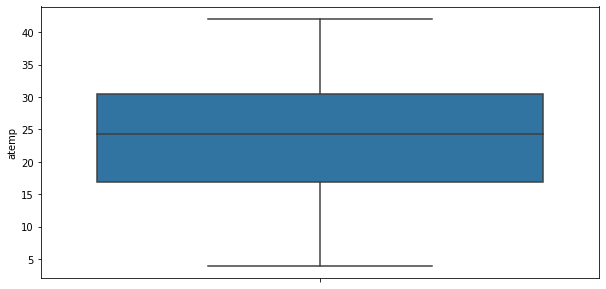

In [26]:
#creating a box plot fot variables with continuous values
#variable - atemp
plt.figure(figsize = (10,5))
sns.boxplot(y = bikesharing['atemp'], data = bikesharing)

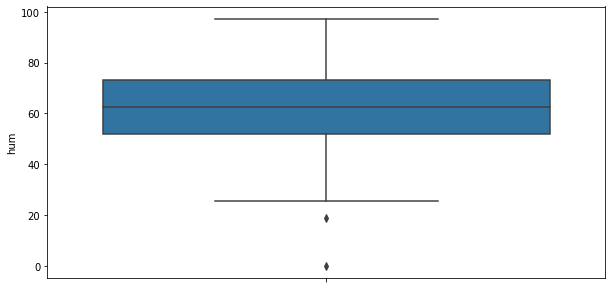

In [27]:
#creating a box plot fot variables with continuous values
#variable - hum
plt.figure(figsize = (10,5))
sns.boxplot(y = bikesharing['hum'], data = bikesharing)

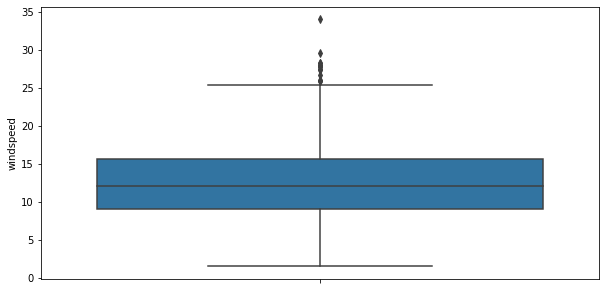

In [28]:
#creating a box plot fot variables with continuous values
#variable - windspeed
plt.figure(figsize = (10,5))
sns.boxplot(y = bikesharing['windspeed'], data = bikesharing)

#### Converting the columns into categorical variables

In [29]:
#converting season, weathersit, mnth, weekday to categorical variables

#variable - season
bikesharing.season.replace({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}, inplace = True)
#variable - weathersit
bikesharing.weathersit.replace({1:'Clear_FewClouds', 2:'Mist_Cloudy', 3:'LightRain_LightSnow_Thunderstorm', 4:'HeavyRain_IcePallets_Thunderstorm_Mist'}, inplace = True)
#variable - mnth
bikesharing.mnth.replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}, inplace = True)
#variable - weekday
bikesharing.weekday.replace({0:'Sun', 1:'Mon', 2:'Tues', 3:'Wed', 4:'Thur', 5:'Fri', 6:'Sat'}, inplace = True)

In [30]:
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,Spring,0,Jan,0,Sat,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985,0
1,Spring,0,Jan,0,Sun,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801,1
2,Spring,0,Jan,0,Mon,1,Clear_FewClouds,8.050924,9.47025,43.7273,16.636703,1349,2
3,Spring,0,Jan,0,Tues,1,Clear_FewClouds,8.200000,10.60610,59.0435,10.739832,1562,3
4,Spring,0,Jan,0,Wed,1,Clear_FewClouds,9.305237,11.46350,43.6957,12.522300,1600,4


## 4. Exploratory Data Analysis 

#### Checking for linear relationships

<Figure size 1440x2160 with 0 Axes>

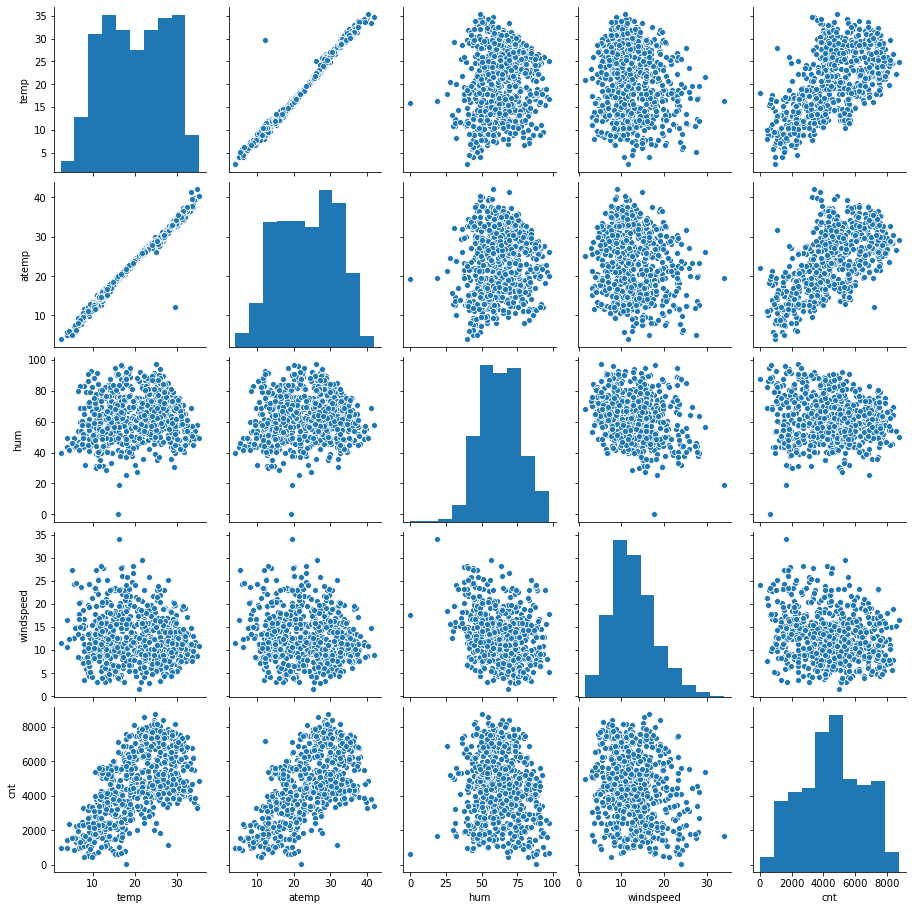

In [31]:
#pairplots for the numerical variables
plt.figure(figsize = (20,30))
sns.pairplot(data = bikesharing, vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt'])
plt.show()

Analysis -
- Looking at the graphs, we can see that the target variable 'cnt' has highest correlation with temp and atemp.
- Also, it can be seen that there is high correlation between temp and atemp.

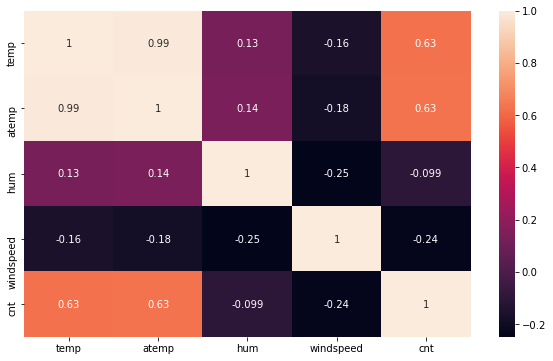

In [32]:
#checking the correlation among the numerical variables
plt.figure(figsize = (10,6))
sns.heatmap(bikesharing[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), annot = True)
plt.show()

Analysis -
- From the above heatmap, we can see that the correlation between temp and atemp is 0.99 which implies they are highly correlated.
- Since, they are highly correlated, we can drop atemp.

#### Correlation among all variables of dataset

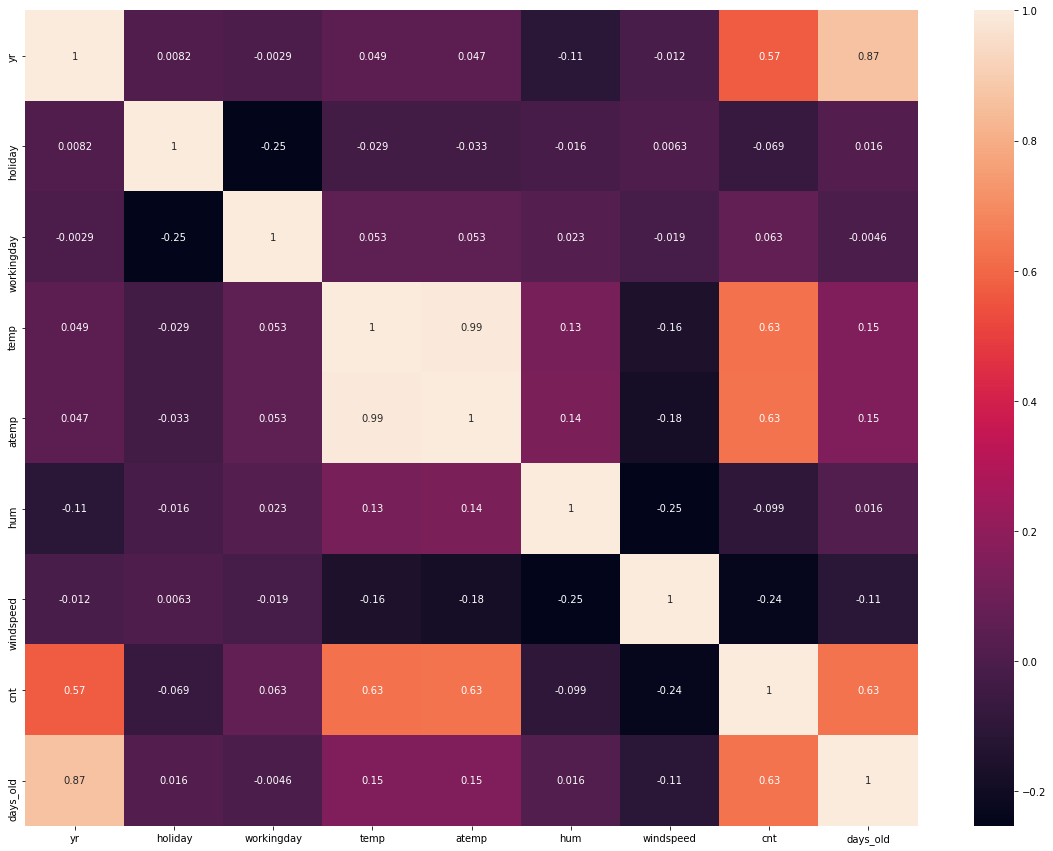

In [33]:
#heathmap for the correlation among all variables
plt.figure(figsize = (20,15))
sns.heatmap(bikesharing.corr(), annot = True)
plt.show()

Analysis -
- From the above heatmap, we can see that there is a good correlation with temp, atemp and days_old.

#### Visualizing categorical variables with target variables

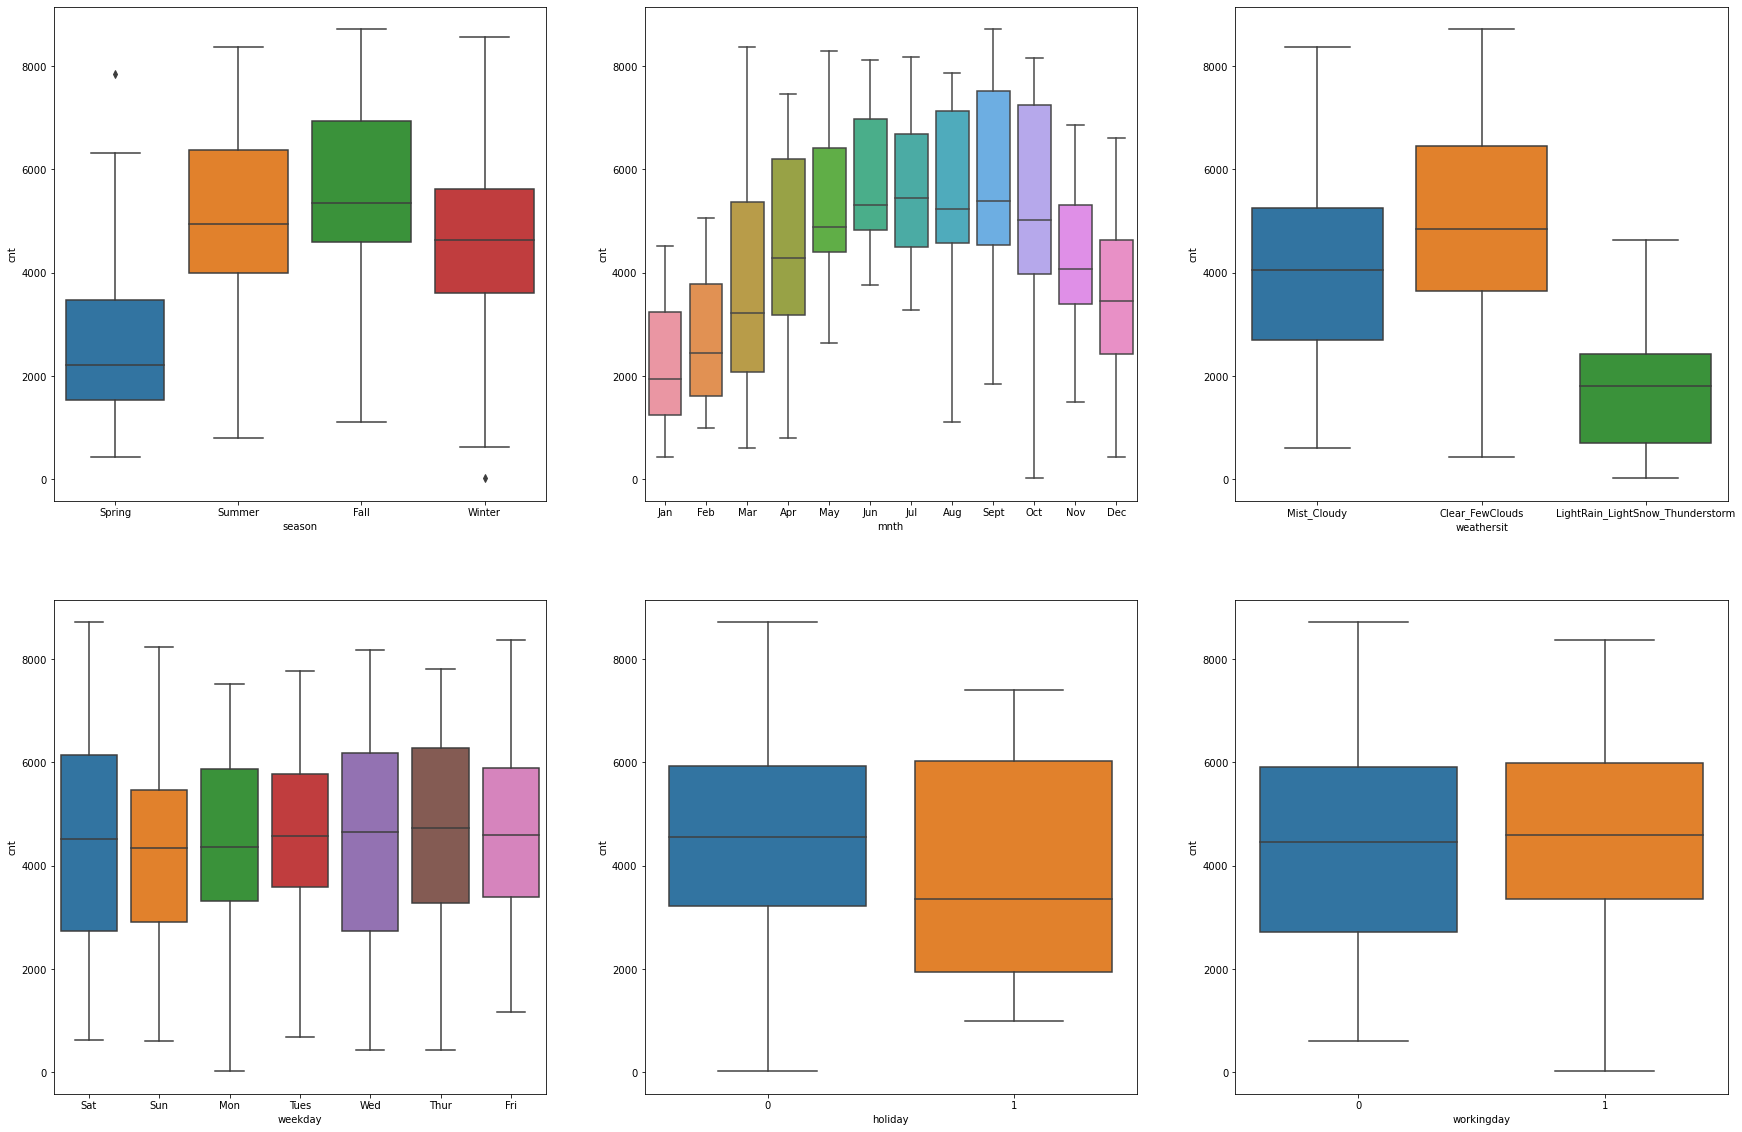

In [34]:
#making boxplots for the categorical variables
plt.figure(figsize=(30,20))

plt.subplot(2,3,1)
sns.boxplot(x='season', y='cnt', data = bikesharing)

plt.subplot(2,3,2)
sns.boxplot(x='mnth', y='cnt', data = bikesharing)

plt.subplot(2,3,3)
sns.boxplot(x='weathersit', y='cnt', data = bikesharing)

plt.subplot(2,3,4)
sns.boxplot(x='weekday', y='cnt', data = bikesharing)

plt.subplot(2,3,5)
sns.boxplot(x='holiday', y='cnt', data = bikesharing)

plt.subplot(2,3,6)
sns.boxplot(x='workingday', y='cnt', data = bikesharing)

plt.show()

Analysis - 
- From the first plot for variable 'season', we can see that the maximum bookings of around 5000 are in the 'Fall' season.
- From the second plot for variable 'mnth', we can see that the demand is increasing continuously till June and after September the demand is decreasing. The maximum demand is in the month of September.
- From the third plot for variable 'weathersit', we can see that maximum booking happened in the 'Clear, Few clouds, Partly cloudy, Partly cloudy' weather.
- From the fifth plot for variable 'holiday', we can see that when there is a holiday, the demand has decreased.
- From the fourth and sixth plot, there are no significant insights that we can make.

#### Visualizing numerical variables with target variables

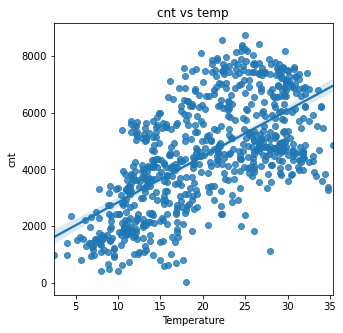

In [35]:
#variable - temp
plt.figure(figsize=(5,5))
plt.title('cnt vs temp')
sns.regplot(data=bikesharing, y='cnt', x='temp')
plt.xlabel('Temperature')
plt.show()

Analysis - 
- Demand is positively correlated to the variable temp.
- Also, we can see that there is a linear relationship between cnt and temp.

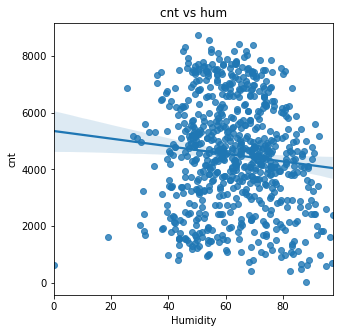

In [36]:
#variable - hum
plt.figure(figsize=(5,5))
plt.title('cnt vs hum')
sns.regplot(data=bikesharing, y='cnt', x='hum')
plt.xlabel('Humidity')
plt.show()

Analysis - 
- Here, the values are more scattered.
- Also, we can see cnt is decreasing with increase in humidity.

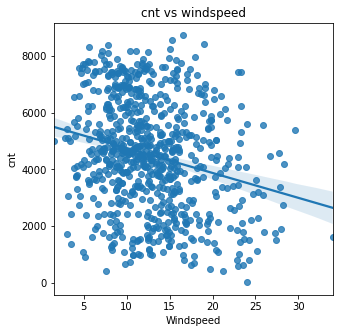

In [37]:
#variable - hum
plt.figure(figsize=(5,5))
plt.title('cnt vs windspeed')
sns.regplot(data=bikesharing, y='cnt', x='windspeed')
plt.xlabel('Windspeed')
plt.show()

Analysis - 
- Here, the values are more scattered.
- Also, we can see cnt is decreasing with increase in windspeed.

## 5. Data Preparation 

#### Creating dummy variables for categorical variables

In [38]:
bikesharing = pd.get_dummies(data=bikesharing,columns=['season','mnth','weekday'],drop_first = True)
bikesharing = pd.get_dummies(data=bikesharing,columns=['weathersit'], drop_first = True)

In [39]:
#columns after creating dummies
bikesharing.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days_old', 'season_Spring', 'season_Summer', 'season_Winter',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thur',
       'weekday_Tues', 'weekday_Wed',
       'weathersit_LightRain_LightSnow_Thunderstorm',
       'weathersit_Mist_Cloudy'],
      dtype='object')

In [40]:
bikesharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_Spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tues,weekday_Wed,weathersit_LightRain_LightSnow_Thunderstorm,weathersit_Mist_Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,0,1,0,0


## 5. Data Splitting and Feature Selection

#### Splitting the dataset into training and test data

In [41]:
#shape before the split
bikesharing.shape

(730, 31)

In [42]:
#y will be the target variable 
y = bikesharing['cnt']
#X will have the independent variables
X = bikesharing.drop(['cnt'], axis = 1)

In [43]:
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_Spring,season_Summer,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tues,weekday_Wed,weathersit_LightRain_LightSnow_Thunderstorm,weathersit_Mist_Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,1,0,...,0,0,0,0,0,0,0,1,0,0


In [44]:
y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

In [45]:
#splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [46]:
#shape after the split
X_train.shape

(511, 30)

In [47]:
X_test.shape

(219, 30)

#### Feature Scaling continuous variables

In [48]:
num_vars = ['temp','atemp','hum','windspeed','days_old']

In [49]:
#using MinMaxScaler
scaler = MinMaxScaler()

In [50]:
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [51]:
#statistics after scaling
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_Spring,season_Summer,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tues,weekday_Wed,weathersit_LightRain_LightSnow_Thunderstorm,weathersit_Mist_Cloudy
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.025440,0.677104,0.537386,0.513133,0.650333,0.320844,0.505822,0.242661,0.246575,...,0.086106,0.080235,0.150685,0.154599,0.142857,0.133072,0.133072,0.158513,0.029354,0.344423
std,0.500412,0.157613,0.468042,0.225640,0.212202,0.145741,0.169639,0.288146,0.429112,0.431440,...,0.280795,0.271923,0.358092,0.361876,0.350270,0.339986,0.339986,0.365579,0.168963,0.475645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.341151,0.332910,0.538858,0.199179,0.256181,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542077,0.529300,0.653499,0.298098,0.512363,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754401,0.414438,0.758929,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_Spring,season_Summer,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tues,weekday_Wed,weathersit_LightRain_LightSnow_Thunderstorm,weathersit_Mist_Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.896978,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.791209,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.585165,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1.000000,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.662088,0,1,...,0,0,0,1,0,0,0,0,0,1


#### Using RFE

In [53]:
#Lienar Regression model using sklearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [54]:
#reducing the number of features to 15 using automated approach
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [55]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days_old', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 2),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 5),
 ('mnth_Dec', False, 15),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 8),
 ('mnth_Mar', False, 16),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 14),
 ('mnth_Oct', False, 3),
 ('mnth_Sept', True, 1),
 ('weekday_Mon', False, 10),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 9),
 ('weekday_Thur', False, 12),
 ('weekday_Tues', False, 11),
 ('weekday_Wed', False, 13),
 ('weathersit_LightRain_LightSnow_Thunderstorm', True, 1),
 ('weathersit_Mist_Cloudy', True, 1)]

In [56]:
#columns selected by RFE
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'days_old',
       'season_Spring', 'season_Winter', 'mnth_Jan', 'mnth_Jul', 'mnth_Sept',
       'weekday_Sat', 'weathersit_LightRain_LightSnow_Thunderstorm',
       'weathersit_Mist_Cloudy'],
      dtype='object')

In [57]:
#columns not selected by RFE
X_train.columns[~rfe.support_]

Index(['atemp', 'season_Summer', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'weekday_Mon', 'weekday_Sun', 'weekday_Thur', 'weekday_Tues',
       'weekday_Wed'],
      dtype='object')

In [58]:
cols = X_train.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'days_old',
       'season_Spring', 'season_Winter', 'mnth_Jan', 'mnth_Jul', 'mnth_Sept',
       'weekday_Sat', 'weathersit_LightRain_LightSnow_Thunderstorm',
       'weathersit_Mist_Cloudy'],
      dtype='object')

In [59]:
X_train_rfe = X_train[cols]

In [60]:
X_train_rfe.shape

(511, 15)

## 7. Model Building

#### Starting with all the variables selected by RFE

#### Model 1 -

Initially taking all the columns selected by RFE

In [61]:
#for the first column, taking all the columns selected by RFE
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'days_old',
       'season_Spring', 'season_Winter', 'mnth_Jan', 'mnth_Jul', 'mnth_Sept',
       'weekday_Sat', 'weathersit_LightRain_LightSnow_Thunderstorm',
       'weathersit_Mist_Cloudy']

In [62]:
X_train_sm1 = sm.add_constant(X_train[cols])
lm = sm.OLS(y_train, X_train_sm1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     182.8
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.03e-190
Time:                        09:30:20   Log-Likelihood:                -4116.8
No. Observations:                 511   AIC:                             8266.
Df Residuals:                     495   BIC:                             8333.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [63]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                                       Features    VIF
6                                      days_old  54.81
4                                           hum  25.50
0                                            yr  22.55
3                                          temp  18.33
2                                    workingday   5.25
8                                 season_Winter   4.48
5                                     windspeed   4.18
7                                 season_Spring   2.97
14                       weathersit_Mist_Cloudy   2.26
12                                  weekday_Sat   1.97
9                                      mnth_Jan   1.83
10                                     mnth_Jul   1.42
11                                    mnth_Sept   1.27
13  weathersit_LightRain_LightSnow_Thunderstorm   1.22
1                                       holiday   1.18


Dropping the variable days_old as it has a very high VIF.

#### Model 2 -

Dropping 'days_old' column from the previous model for the second model

In [64]:
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Jan', 'mnth_Jul', 'mnth_Sept',
       'weekday_Sat', 'weathersit_LightRain_LightSnow_Thunderstorm',
       'weathersit_Mist_Cloudy']

In [65]:
X_train_sm2 = sm.add_constant(X_train[cols])
lm = sm.OLS(y_train, X_train_sm2).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.7
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          3.43e-190
Time:                        09:30:22   Log-Likelihood:                -4120.8
No. Observations:                 511   AIC:                             8272.
Df Residuals:                     496   BIC:                             8335.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [66]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                                       Features    VIF
4                                           hum  24.14
3                                          temp  16.76
2                                    workingday   5.21
5                                     windspeed   4.17
6                                 season_Spring   2.97
13                       weathersit_Mist_Cloudy   2.24
7                                 season_Winter   2.13
0                                            yr   2.08
11                                  weekday_Sat   1.95
8                                      mnth_Jan   1.67
9                                      mnth_Jul   1.41
12  weathersit_LightRain_LightSnow_Thunderstorm   1.21
10                                    mnth_Sept   1.20
1                                       holiday   1.17


Dropping the variable mnth_Jan as it has a comparatively high p-value, hence, it is an insignificant variable.

#### Model 3 - 

Dropping 'mnth_Jan' column from the previous model for the third model

In [67]:
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Jul', 'mnth_Sept',
       'weekday_Sat', 'weathersit_LightRain_LightSnow_Thunderstorm',
       'weathersit_Mist_Cloudy']

In [68]:
X_train_sm3 = sm.add_constant(X_train[cols])
lm = sm.OLS(y_train, X_train_sm3).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.3
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          3.29e-190
Time:                        09:30:25   Log-Likelihood:                -4123.5
No. Observations:                 511   AIC:                             8275.
Df Residuals:                     497   BIC:                             8334.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [69]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                                       Features    VIF
4                                           hum  23.36
3                                          temp  16.02
2                                    workingday   5.19
5                                     windspeed   4.16
6                                 season_Spring   2.63
12                       weathersit_Mist_Cloudy   2.24
7                                 season_Winter   2.11
0                                            yr   2.07
10                                  weekday_Sat   1.94
8                                      mnth_Jul   1.40
11  weathersit_LightRain_LightSnow_Thunderstorm   1.21
9                                     mnth_Sept   1.20
1                                       holiday   1.17


Dropping the variable days_old as it has the highest VIF among the remaining variables.

#### Model 4 -  

Dropping 'hum' column from the previous model for the fourth model

In [70]:
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Jul', 'mnth_Sept',
       'weekday_Sat', 'weathersit_LightRain_LightSnow_Thunderstorm',
       'weathersit_Mist_Cloudy']

In [71]:
X_train_sm4 = sm.add_constant(X_train[cols])
lm = sm.OLS(y_train, X_train_sm4).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.8
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          4.75e-188
Time:                        09:30:28   Log-Likelihood:                -4131.5
No. Observations:                 511   AIC:                             8289.
Df Residuals:                     498   BIC:                             8344.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [72]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                                       Features   VIF
3                                          temp  6.83
2                                    workingday  4.98
4                                     windspeed  4.15
0                                            yr  2.07
9                                   weekday_Sat  1.91
5                                 season_Spring  1.88
11                       weathersit_Mist_Cloudy  1.54
6                                 season_Winter  1.48
7                                      mnth_Jul  1.37
8                                     mnth_Sept  1.20
1                                       holiday  1.16
10  weathersit_LightRain_LightSnow_Thunderstorm  1.08


Dropping the variable holiday as it has a comparatively high p-value, hence, it is an insignificant variable.

#### Model 5 - 

Dropping 'holiday' column from the previous model for the fifth model

In [73]:
cols = ['yr', 'workingday', 'temp', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Jul', 'mnth_Sept',
       'weekday_Sat', 'weathersit_LightRain_LightSnow_Thunderstorm',
       'weathersit_Mist_Cloudy']

In [74]:
X_train_sm5 = sm.add_constant(X_train[cols])
lm = sm.OLS(y_train, X_train_sm5).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     232.3
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          2.66e-188
Time:                        09:30:31   Log-Likelihood:                -4133.7
No. Observations:                 511   AIC:                             8291.
Df Residuals:                     499   BIC:                             8342.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [75]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                                       Features   VIF
2                                          temp  6.56
1                                    workingday  4.48
3                                     windspeed  4.12
0                                            yr  2.07
4                                 season_Spring  1.81
8                                   weekday_Sat  1.79
10                       weathersit_Mist_Cloudy  1.54
5                                 season_Winter  1.44
6                                      mnth_Jul  1.36
7                                     mnth_Sept  1.20
9   weathersit_LightRain_LightSnow_Thunderstorm  1.08


Dropping the variable temp as it has the highest VIF among the remaining variables.

#### Model 6 - 

Dropping 'temp' column from the previous model for the sixth model

In [76]:
cols = ['yr', 'workingday', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Jul', 'mnth_Sept',
       'weekday_Sat', 'weathersit_LightRain_LightSnow_Thunderstorm',
       'weathersit_Mist_Cloudy']

In [77]:
X_train_sm6 = sm.add_constant(X_train[cols])
lm = sm.OLS(y_train, X_train_sm6).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     162.2
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          6.29e-150
Time:                        09:30:33   Log-Likelihood:                -4227.2
No. Observations:                 511   AIC:                             8476.
Df Residuals:                     500   BIC:                             8523.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [78]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                                      Features   VIF
2                                    windspeed  3.44
1                                   workingday  3.18
0                                           yr  1.89
3                                season_Spring  1.56
7                                  weekday_Sat  1.54
9                       weathersit_Mist_Cloudy  1.53
4                                season_Winter  1.43
5                                     mnth_Jul  1.14
6                                    mnth_Sept  1.12
8  weathersit_LightRain_LightSnow_Thunderstorm  1.08


Dropping the variable mnth_Jul as it has a comparatively high p-value, hence, it is an insignificant variable.

#### Model 7 - 

Dropping 'mnth_Jul' column from the previous model for the seventh model

In [79]:
cols = ['yr', 'workingday', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Sept',
       'weekday_Sat', 'weathersit_LightRain_LightSnow_Thunderstorm',
       'weathersit_Mist_Cloudy']

In [80]:
X_train_sm7 = sm.add_constant(X_train[cols])
lm = sm.OLS(y_train, X_train_sm7).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          6.98e-151
Time:                        09:30:38   Log-Likelihood:                -4227.7
No. Observations:                 511   AIC:                             8475.
Df Residuals:                     501   BIC:                             8518.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [81]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                                      Features   VIF
2                                    windspeed  3.43
1                                   workingday  3.08
0                                           yr  1.87
6                                  weekday_Sat  1.52
8                       weathersit_Mist_Cloudy  1.52
3                                season_Spring  1.50
4                                season_Winter  1.39
5                                    mnth_Sept  1.11
7  weathersit_LightRain_LightSnow_Thunderstorm  1.08


Dropping the variable windspeed as it has the highest VIF among the remaining variables.

#### Model 8 -  

Dropping 'windspeed' column from the previous model for the eighth model

In [82]:
cols = ['yr', 'workingday', 
       'season_Spring', 'season_Winter', 'mnth_Sept',
       'weekday_Sat', 'weathersit_LightRain_LightSnow_Thunderstorm',
       'weathersit_Mist_Cloudy']

In [83]:
X_train_sm8 = sm.add_constant(X_train[cols])
lm = sm.OLS(y_train, X_train_sm8).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     183.7
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          8.32e-144
Time:                        09:30:41   Log-Likelihood:                -4247.1
No. Observations:                 511   AIC:                             8512.
Df Residuals:                     502   BIC:                             8550.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [84]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                                      Features   VIF
1                                   workingday  2.32
0                                           yr  1.79
7                       weathersit_Mist_Cloudy  1.51
2                                season_Spring  1.37
3                                season_Winter  1.36
5                                  weekday_Sat  1.31
4                                    mnth_Sept  1.11
6  weathersit_LightRain_LightSnow_Thunderstorm  1.07


Dropping the variable workingday as it has the highest VIF among the remaining variables.

#### Model 9 - 

Dropping 'workingday' column from the previous model for the ninth model

In [85]:
cols = ['yr','season_Spring', 'season_Winter', 'mnth_Sept',
       'weekday_Sat', 'weathersit_LightRain_LightSnow_Thunderstorm',
       'weathersit_Mist_Cloudy']

In [86]:
X_train_sm9 = sm.add_constant(X_train[cols])
lm = sm.OLS(y_train, X_train_sm9).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     200.8
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          3.31e-141
Time:                        09:30:44   Log-Likelihood:                -4255.9
No. Observations:                 511   AIC:                             8528.
Df Residuals:                     503   BIC:                             8562.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [87]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                                      Features   VIF
0                                           yr  1.43
6                       weathersit_Mist_Cloudy  1.36
2                                season_Winter  1.27
1                                season_Spring  1.24
4                                  weekday_Sat  1.13
3                                    mnth_Sept  1.08
5  weathersit_LightRain_LightSnow_Thunderstorm  1.05


#### Model 10 - 

Adding the column 'temp' for the tenth model

In [88]:
cols = ['yr','season_Spring', 'season_Winter', 'mnth_Sept',
       'weekday_Sat', 'weathersit_LightRain_LightSnow_Thunderstorm',
       'weathersit_Mist_Cloudy', 'temp']

In [89]:
X_train_sm10 = sm.add_constant(X_train[cols])
lm = sm.OLS(y_train, X_train_sm10).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     272.4
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          3.32e-177
Time:                        09:30:47   Log-Likelihood:                -4168.5
No. Observations:                 511   AIC:                             8355.
Df Residuals:                     502   BIC:                             8393.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [90]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                                      Features   VIF
7                                         temp  2.47
0                                           yr  2.04
6                       weathersit_Mist_Cloudy  1.49
2                                season_Winter  1.29
1                                season_Spring  1.24
4                                  weekday_Sat  1.17
3                                    mnth_Sept  1.15
5  weathersit_LightRain_LightSnow_Thunderstorm  1.06


Adding the 'temp' variable increases the R-squared value and the VIF and p-value for the same is within the limits.

#### Model 11 -  

Adding the column 'holiday' for the eleventh model

In [91]:
cols = ['yr','season_Spring', 'season_Winter', 'mnth_Sept',
       'weekday_Sat', 'weathersit_LightRain_LightSnow_Thunderstorm',
       'weathersit_Mist_Cloudy', 'temp', 'holiday']

In [92]:
X_train_sm11 = sm.add_constant(X_train[cols])
lm = sm.OLS(y_train, X_train_sm11).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     249.0
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.25e-178
Time:                        09:30:48   Log-Likelihood:                -4162.3
No. Observations:                 511   AIC:                             8345.
Df Residuals:                     501   BIC:                             8387.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [93]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                                      Features   VIF
7                                         temp  2.48
0                                           yr  2.04
6                       weathersit_Mist_Cloudy  1.49
2                                season_Winter  1.31
1                                season_Spring  1.26
4                                  weekday_Sat  1.18
3                                    mnth_Sept  1.15
5  weathersit_LightRain_LightSnow_Thunderstorm  1.06
8                                      holiday  1.05


- Adding the 'holiday' variable increases the R-squared value and the VIF and p-value for the same is within the limits.
- Also, we can see that the p-value for the variable 'weekday_Sat' is comparatively high, hence, dropping it.

#### Model 12 - 

Dropping the variable 'weekday_Sat' and instead using 'weekday_Sun'

In [94]:
cols = ['yr','season_Spring', 'season_Winter', 'mnth_Sept',
       'weathersit_LightRain_LightSnow_Thunderstorm',
       'weathersit_Mist_Cloudy', 'temp', 'holiday','weekday_Sun']

In [95]:
X_train_sm12 = sm.add_constant(X_train[cols])
lm = sm.OLS(y_train, X_train_sm12).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     258.2
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          7.64e-182
Time:                        09:30:51   Log-Likelihood:                -4154.7
No. Observations:                 511   AIC:                             8329.
Df Residuals:                     501   BIC:                             8372.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [96]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                                      Features   VIF
6                                         temp  2.49
0                                           yr  2.04
5                       weathersit_Mist_Cloudy  1.49
2                                season_Winter  1.31
1                                season_Spring  1.25
8                                  weekday_Sun  1.17
3                                    mnth_Sept  1.15
4  weathersit_LightRain_LightSnow_Thunderstorm  1.07
7                                      holiday  1.05


Analysis - 
Selecting this model because of the following reasons :
- p value for all variables is 0.0 and R2 is 0.823
- VIF for all the variables is almost in acceptable range which means no multicollinearity
- Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model.

#### Building the final model using sklearn 

In [97]:
cols = ['yr','season_Spring', 'season_Winter', 'mnth_Sept',
       'weathersit_LightRain_LightSnow_Thunderstorm',
       'weathersit_Mist_Cloudy', 'temp', 'holiday','weekday_Sun']

In [98]:
lr = LinearRegression()
lr.fit(X_train[cols], y_train)

LinearRegression()

In [99]:
print(lr.coef_)

[ 2040.94346875 -1010.69805025   498.05235418   650.77848391
 -2667.35392644  -680.77466435  3720.78685721  -934.59229436
  -432.89807784]


In [100]:
print(lr.intercept_)

1921.01265141135


In [101]:
coeff_df = pd.DataFrame(lr.coef_,X_train[cols].columns,columns=['Coefficient'])
coeff_df

,Coefficient
yr,2040.943469
season_Spring,-1010.698050
season_Winter,498.052354
mnth_Sept,650.778484
weathersit_LightRain_LightSnow_Thunderstorm,-2667.353926
weathersit_Mist_Cloudy,-680.774664
temp,3720.786857
holiday,-934.592294
weekday_Sun,-432.898078


## 8. Model Evaluation

#### Residual Analysis 

In [102]:
#predicting for the training data set
y_train_pred = lr.predict(X_train[cols])

In [103]:
#residual
res = y_train - y_train_pred

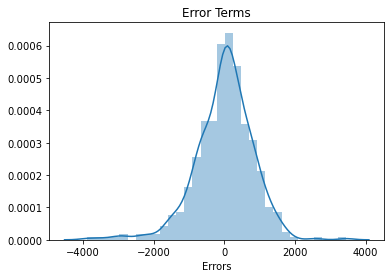

In [104]:
#plotting the histogram of the error terms
sns.distplot(res)
plt.title('Error Terms')
plt.xlabel('Errors')
plt.show()

Analysis -
- From the histogram, we can see that the residuals are normally distributed. Hence, our assumption is valid.

#### Linear Relationship 

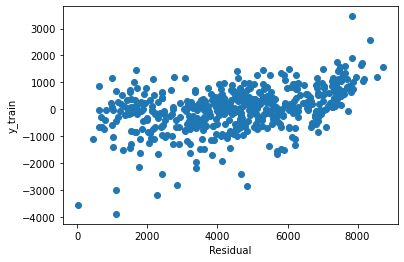

In [105]:
#plotting the sctter plot for residuals
plt.scatter(y_train,res)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

#### Homoscedasticity

Text(0, 0.5, 'y_train_pred')

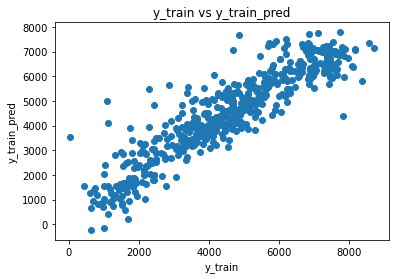

In [106]:
plt.scatter(y_train, y_train_pred)
plt.title('y_train vs y_train_pred')             
plt.xlabel('y_train')                         
plt.ylabel('y_train_pred')

Analysis -
- We can observe that variance of the residuals (error terms) is constant across predictions. i.e error term does not vary much as the value of the predictor variable changes.

#### Multicollinearity

In [107]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                                      Features   VIF
6                                         temp  2.49
0                                           yr  2.04
5                       weathersit_Mist_Cloudy  1.49
2                                season_Winter  1.31
1                                season_Spring  1.25
8                                  weekday_Sun  1.17
3                                    mnth_Sept  1.15
4  weathersit_LightRain_LightSnow_Thunderstorm  1.07
7                                      holiday  1.05


Analysis -
- From the VIF calculation, we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5.

## 9. Making Predictions

#### Predicting the values for the test dataset

In [108]:
#scaling the variables in X_test
num_vars = ['temp','atemp','hum','windspeed','days_old']

#test data will only be transformed and not fit
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [109]:
#columns for our final model
cols = ['yr','season_Spring', 'season_Winter', 'mnth_Sept',
       'weathersit_LightRain_LightSnow_Thunderstorm',
       'weathersit_Mist_Cloudy', 'temp', 'holiday','weekday_Sun']

In [110]:
#predicting the values for test dataset
y_test_pred = lr.predict(X_test[cols])

#### R-Squared value for the test dataset 

In [111]:
r2_score(y_test,y_test_pred)

0.8102939676082294

Analysis -
- R2 value for predictions on test dataset(0.810) is similar to R2 value of training dataset(0.823). This is a good R-squared value, hence we can see our model is performing good even on test dataset.

## 10. Final Interpretations 

In [112]:
coeff_df

,Coefficient
yr,2040.943469
season_Spring,-1010.698050
season_Winter,498.052354
mnth_Sept,650.778484
weathersit_LightRain_LightSnow_Thunderstorm,-2667.353926
weathersit_Mist_Cloudy,-680.774664
temp,3720.786857
holiday,-934.592294
weekday_Sun,-432.898078


#### Equation for the best fit line  

cnt = 1921.0127 + (2040.943469*yr) + ((-1010.698050)*season_Spring) +(498.052354*season_Winter) + (650.778484*mnth_Sept) + ((-2667.353926)*weathersit_LightRain_LightSnow_Thunderstorm) + ((-680.774664)*weathersit_Mist_Cloudy) + (3720.786857*temp) + ((-934.592294)*holiday) + ((-432.898078)*weekday_Sun)

#### Intrepretation of the equation 

- yr - Coefficient of yr indicates that a unit increase in yr variable, will increase bike hiring by 2040.943469 value.
- season_Spring - Coefficient of season_Spring indicates that a unit increase in season_Spring variable, will decrease the bike hiring by 1010.698050 value.
- season_Winter - Coefficient of season_Winter indicates that a unit increase in season_Winter variable, will increase bike hiring by 498.052354 value.
- mnth_Sept - Coefficient of mnth_Sept indicates that a unit increase in mnth_Sept variable, will increase bike hiring by 650.778484 value.
- weathersit_LightRain_LightSnow_Thunderstorm - Coefficient of weathersit_LightRain_LightSnow_Thunderstorm indicates that a unit increase in weathersit_LightRain_LightSnow_Thunderstorm variable, will decrease the bike hiring by 2667.353926 value.
- weathersit_Mist_Cloudy - Coefficient of weathersit_Mist_Cloudy indicates that a unit increase in weathersit_Mist_Cloudy variable, will decrease the bike hiring by 680.774664 value.
- temp - Coefficient of temp indicates that a unit increase in temp variable, will increase bike hiring by 3720.786857 value.
- holiday - Coefficient of holiday indicates that a unit increase in holiday variable, will decrease the bike hiring by 934.592294 value.
- weekday_Sun - Coefficient of weekday_Sun indicates that a unit increase in weekday_Sun variable, will decrease the bike hiring by 432.898078 value.

#### Significant variables to predict the demand for shared bikes

- temp
- yr
- holiday
- season
- weekday Sunday
- month